In [1]:
pip install konlpy --no-deps

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm, tqdm_notebook
from sklearn.manifold import TSNE
import os, re
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup as bs
import json
import pymysql
import openpyxl
import sys, csv
import datetime
import class3
import json


In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# 데이터 불러오기
PATH = '../luvd_data/'

df = pd.read_csv(PATH + "dataset_1027.csv", encoding='UTF8', index_col=0)
df

,result,last,reason,action,try,reaction,valuable,start,charmingLover,charmingCustomer,relation,event,NEW_result,test_Blank_asterisk_remove_target_result
0,서로 확신이 없음. 권태의 극복,마지막싸움은 8월말이고 이별 통보를 받지 않앗어요 바쁘니까 바쁜거 지나고 나면잘 풀...,오빠를 믿지 못햇던 거에 대한 실망?,친구들과 많이 놀러다녔죠,내가 앞으로 어떻게 할수 잇는지에대한 얘기를 많이 했죠 근데 정확히 헤어지자 한게 ...,예쁘게 잘 만나고 싶어요,결혼하자고 까지 햇던 사람이고 많은 약속을 한 사람이라 소중하죠,연애상담하다가,모든게 능숙하고 빠지는게 없죠,착해요,세상에서 나보다 사랑받는 사람은 없구나,늘 항상 보살핌받고 사랑받앗고 저희집에서 가들과 보낸시간이 많아요 부모님 생신도 오...,서로확신이없음권태의극복,2
1,서로 잘하려했으나 오해의 각이 깊어짐,싸우진 않았고 두달 전부터 혼자 마음 정리 하고 있었나봐요 그러고 헤어지자고 하더라...,저랑 결혼 하고 싶어하는데 제가 본인을 창피하게 생각하고 있다고 오래하고 있어요,나쁜 점만 생각하고 있어요,문자 연락 전화 연락 했는데 한달 후에 만나서 얘기하자는 답만 왔어요,결혼하려구요,결혼 할거면 꼭 이사람이랑 할거예요,게임 동호회에서 만났어요,그냥 한결같은 사람이예요,너무 평범하죠,오래 만나서 그런지 쳔안하고 익숙한 관계,크리스마스때 직접 요리해주거나 평소에도 요리 잘해주고 특별한 이벤트는 없지만 평소 ...,서로잘하려했으나오해의각이깊어짐,27
2,바람으로 느껴짐,둘이 놀다가 여자친구가 제 핸드폰 카톡을 봤고 순간 뺏어가서 삭제했습니다 거기에 여...,술먹고 연락 늦게하기. 여자랑 친하게 지냈던거.,술먹기. 집앞에 찾아가기. 핸드폰 다 삭제하기. 연락하기. 사진보기. 맨날 페북들어...,연락해서 잡고 전화로도 잡고 여자친구들헌테도 밀좀 잘해달라하고,여자들은 처다보지도 않고 오로지 여자친구만 바라보고 살거입니다,모든걸 주고도 바꾸지 못할정도의 가치있고 소중한 사람입니다,고등학교때 제가 2학년때 여자가 1학년신입생우로 들어왔는데 그때부터 짝사랑 하다가 ...,이쁘고 귀엽고 애교도 부리고 답장도 빠르고 같이 몇시간을 있더라고 행복하게 하는 매력,그냥 별볼일 없지만 잘해주기만 했습니다,같이 하루종일 영화보고 까페가고 아침에만나서 저녁에 집들어갈때 집앞에서 앉아있다가 ...,"생일 선물,파티 신발사주기 , 꽃사주기 한강놀러가기",바람으로느껴짐,9
3,"회피, 무한이기주의 ; 내담자 마음대로 주장하고 연애",싸움은 없었어요 서울 근교 여행에서부터 내마음이 불편해지기 시작했고 어색했던 기류와...,서로 알아가는 시간중에 서로에 대해 너무 몰랐고 대화가 부족햇어요 \n사소한 사건들...,책을 많이 봤어요 강의도 많이 듣고 전시도 보러 다니고 친구들 만나고,지난 일요일 (헤어진지 3달째) 카톡 연락을 했어요 잘지내냐고 \n답이 없을 줄 알...,믿어주고 싶어요 그냥 잘 지내고 싶어요 \n저의 섣불렀던 결정이 후회되네요 \n감정...,글쎄요 아직 그만큼을 만나보지 않아서 \n단 2달만에 그사람의 가치를 판단하기 어...,소개팅,조용하고 차분해요 소신있고 신중해요,웃음이 많고 리액션이 좋아요 따뜻하고 정이많아요 좋아하는 사람앞에서는 애교도 많구요,처음 만나서 서로에게 높은 호감을 가지고 열흘 정도 썸을 타다 남자가 사귀자 했어요...,만난지 한달쯤 되었을때 서울 근교로 1박 여행을 갔고 마음은 들뜨고 좋은데 많이 불...,회피무한이기주의내담자마음대로주장하고연애,10
4,서로 자존심을 부림 이겨먹기,마지막싸움은 사소한 말때문에 그렇습니다. 제가 그녀에게 쉬는 날에 나를 만나는것도 ...,완전헤어진건 아니지만 전에 작성했듯이 저한테 많이 소홀한면도 있고 나보다 다른약속을...,잠시 연락안한지는 한 10일됫는데 티비를 본다거나 친구를 밀나면서 그리움을 잊어보려...,sns는 저는 카톡외에는 하지않아서 심경변화에 대해서 티를 낸적이 없습니다.카톡.전...,평소에는 정말 잘해주었는데 어떻게 해주냐고 물으면 전에보다 놀러도 잘다니고 여친이 ...,저에게는 너무나도 소중한사람이죠 외로운저에게 흔쾌히 연락도 해주고 저에게 좋은시간을...,교회에서 같은 반이 되었는데 4년전에 처음만났고 여친이 해외항공승무원 이다보니 한국...,여친은 털털하면서도 때로는 엉뚱하고 유쾌해서 말주변이 없는 제가 보기에는 정말 사랑...,음..저는 그냥 되게 착한남자 스타일이고 상대방을 존중하고 야간 츤데레같은 기질이 ...,사귀는 동안에는 공원으로 놀러두 가고 뮤지컬은 한달에 한번씩은 꼭보고.vip석 앞자...,22때는 뮤지컬 보러가구.50일에는 깜짝 선물도 하고.핑크골드 팔찌해주고 100일에...,서로자존심을부림이겨먹기,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,서로 이성친구 동료에 대한 가치관이 다름.,"마지막 싸움은 제가 그친구 핸드폰을 카톡을 몰래 보게 되었었는데, 카톡에 여사친과의...",서로 자존심이 쎄서 서로 입장만 이해받고 싶어 했었어요. 헤어지기전에 마지막 카톡에...,혼자서 계속 자기 합리화를 했던것 같아요.,"연락을 하고 싶긴 했지만, 저한테 상처를 많이 받았다고 했고 자기 말 좀 들어달라그...",원하는대로 표현을 많이 해줄 것 같아요. 헤어지고 느낀점이지만 비단 이 연애가 다시...,든든했어요. 제가 기댈 수 있는 사람같았어요.,"비행기에서 옆자리였는데 제가 번호를 땄구요, 그 후 상대의 구애로 사귀게 되었어요",감정에 크게 동요되지않는 편이에요. 저는 일상에서 많은 선택에서 감정에 롤러코스터를...,저는 이런생각 저런생각이 많아서 상대가 느끼기에 재밌다고 생각했을 것 같아요. 상대...,"아침에 일어났을때 애정담긴 모닝카톡을 먼저 보내기도 했구요, 100일 이럴때는 서프...",딱히 이벤트가 기억난다기 보다는 그냥 경치좋은 곳에 같이 앉아서 그 시간을 함께 했...,서로이성친구동료에대한가치관이다름,11
6296,상대는 연애보단 친구들과 놀고 싶어함.,남자친구가 클럽과 감주가는걸 좋아했었는데 한달에 한번? 아예 안갈때도 있었어요 초반...,남자친구가 클럽과 감주가는걸 좋아했었는데 한달에 한번? 아예 안갈때도 있었어요 초반...,친구를 만나 의견도 들어보고 술도 먹고 일하는거에 집중했어요,헤어진 당일 두세번정도 붙잡았고 그 이후로는 연락한적없어요,솔직히 남자친구가 가는 클럽이랑 감주를 왜 좋아하는지 궁금해서 여자만나러 가는게 아...,나를 행복하게 해주는 사람이에요,길걷다가 이상형이라며 번호따였습니다,키가 크고 귀엽고 착하고 다정해요,몸매가 좋고 웃는게 이쁘고 착하고 긍정적이에요,데이트는 일주일에 세번정도? 제가 남자친구를 보러 자주 찾아가기도 했었고 옷도 사주...,제가 레고를 좋아하는데 원하는 물품이 품절되어 속상해했었는데 남자친구가 해외배송으로...,상대는연애보단친구들과놀고싶어함,71
6297,참다가 서운함을 말함. 욱해서 먼저 지름,"저는 34,남자는 32\n두달전 소개팅으로만나고\n이주 썸을 타고\n남자애는. 천천...","저는 34,남자는 32\n두달전 소개팅으로만나고\n이주 썸을 타고\n남자애는. 천천...",술마시고\n친구만나고,전화 하고\n카톡하고,충분한 대화를 하고싶고\n태어나서 가족말고 이렇게\n누구를 좋아해본적이없어서\n정말...,가족만큼 정말 제가\n태어나서 좋아해본 사람이에요,소개팅 입니다,침착하고\n솔직하고 당당하고,저는매사에 생각이 많고\n일어나지 않은 일에 걱정을 많이해요,제가 제일 중요하게 생각하는 연락을 잘지켜줬어요,\n일주일전 싸우고 \n집에서 제가 제일 좋아하는 음식을 해줬어요,참다가서운함을말함욱해서먼저지름,29
6298,잦은 싸움,자주 싸우고 또 저가 싸울때마다 말도 막하고해서 그런게 쌓이고 싸여서 많이 지쳐서 ...,서로 자주 다투고 싸우고 그럴때마다 저가 말을 막하고 욱하는 성격에 자주 상처를 줬...,술도 마시고 친구들도 만나고 유튜브도 많이보고 했습니다.,너무 조급하고 어떻게 하면 만날 수 있을지 또 저에 문제에 대해 고쳐볼려고 독서도 ...,버도 성질 죽이는 연습 많이

In [5]:
def blank_and_asterisk_remove_function(dataframe,target_col,create_col):
    pattern = re.compile(r'\s+')
    new_result = []
    for text in dataframe[target_col]:
        if pd.isna(text) == True:
            new_result.append(text)
        else:
            temp_0=re.sub(r'[^\w]', ' ', text)
            new_result.append(re.sub(pattern, ' ', temp_0))
    dataframe[create_col] = new_result
    return dataframe

In [6]:
df = blank_and_asterisk_remove_function(df,'last','re_last')
df = blank_and_asterisk_remove_function(df,'reason','re_reason')
df = blank_and_asterisk_remove_function(df,'action','re_action')
df = blank_and_asterisk_remove_function(df,'try','re_try')
df = blank_and_asterisk_remove_function(df,'reaction','re_reaction')
df = blank_and_asterisk_remove_function(df,'valuable','re_valuable')
df = blank_and_asterisk_remove_function(df,'start','re_start')
df = blank_and_asterisk_remove_function(df,'charmingLover','re_charmingLover')
df = blank_and_asterisk_remove_function(df,'charmingCustomer','re_charmingCustomer')
df = blank_and_asterisk_remove_function(df,'relation','re_relation')
df = blank_and_asterisk_remove_function(df,'event','re_event')
#df = blank_and_asterisk_remove_function(df,'result','re_result')
df

,result,last,reason,action,try,reaction,valuable,start,charmingLover,charmingCustomer,...,re_reason,re_action,re_try,re_reaction,re_valuable,re_start,re_charmingLover,re_charmingCustomer,re_relation,re_event
0,서로 확신이 없음. 권태의 극복,마지막싸움은 8월말이고 이별 통보를 받지 않앗어요 바쁘니까 바쁜거 지나고 나면잘 풀...,오빠를 믿지 못햇던 거에 대한 실망?,친구들과 많이 놀러다녔죠,내가 앞으로 어떻게 할수 잇는지에대한 얘기를 많이 했죠 근데 정확히 헤어지자 한게 ...,예쁘게 잘 만나고 싶어요,결혼하자고 까지 햇던 사람이고 많은 약속을 한 사람이라 소중하죠,연애상담하다가,모든게 능숙하고 빠지는게 없죠,착해요,...,오빠를 믿지 못햇던 거에 대한 실망,친구들과 많이 놀러다녔죠,내가 앞으로 어떻게 할수 잇는지에대한 얘기를 많이 했죠 근데 정확히 헤어지자 한게 ...,예쁘게 잘 만나고 싶어요,결혼하자고 까지 햇던 사람이고 많은 약속을 한 사람이라 소중하죠,연애상담하다가,모든게 능숙하고 빠지는게 없죠,착해요,세상에서 나보다 사랑받는 사람은 없구나,늘 항상 보살핌받고 사랑받앗고 저희집에서 가들과 보낸시간이 많아요 부모님 생신도 오...
1,서로 잘하려했으나 오해의 각이 깊어짐,싸우진 않았고 두달 전부터 혼자 마음 정리 하고 있었나봐요 그러고 헤어지자고 하더라...,저랑 결혼 하고 싶어하는데 제가 본인을 창피하게 생각하고 있다고 오래하고 있어요,나쁜 점만 생각하고 있어요,문자 연락 전화 연락 했는데 한달 후에 만나서 얘기하자는 답만 왔어요,결혼하려구요,결혼 할거면 꼭 이사람이랑 할거예요,게임 동호회에서 만났어요,그냥 한결같은 사람이예요,너무 평범하죠,...,저랑 결혼 하고 싶어하는데 제가 본인을 창피하게 생각하고 있다고 오래하고 있어요,나쁜 점만 생각하고 있어요,문자 연락 전화 연락 했는데 한달 후에 만나서 얘기하자는 답만 왔어요,결혼하려구요,결혼 할거면 꼭 이사람이랑 할거예요,게임 동호회에서 만났어요,그냥 한결같은 사람이예요,너무 평범하죠,오래 만나서 그런지 쳔안하고 익숙한 관계,크리스마스때 직접 요리해주거나 평소에도 요리 잘해주고 특별한 이벤트는 없지만 평소 ...
2,바람으로 느껴짐,둘이 놀다가 여자친구가 제 핸드폰 카톡을 봤고 순간 뺏어가서 삭제했습니다 거기에 여...,술먹고 연락 늦게하기. 여자랑 친하게 지냈던거.,술먹기. 집앞에 찾아가기. 핸드폰 다 삭제하기. 연락하기. 사진보기. 맨날 페북들어...,연락해서 잡고 전화로도 잡고 여자친구들헌테도 밀좀 잘해달라하고,여자들은 처다보지도 않고 오로지 여자친구만 바라보고 살거입니다,모든걸 주고도 바꾸지 못할정도의 가치있고 소중한 사람입니다,고등학교때 제가 2학년때 여자가 1학년신입생우로 들어왔는데 그때부터 짝사랑 하다가 ...,이쁘고 귀엽고 애교도 부리고 답장도 빠르고 같이 몇시간을 있더라고 행복하게 하는 매력,그냥 별볼일 없지만 잘해주기만 했습니다,...,술먹고 연락 늦게하기 여자랑 친하게 지냈던거,술먹기 집앞에 찾아가기 핸드폰 다 삭제하기 연락하기 사진보기 맨날 페북들어가서 뭔일...,연락해서 잡고 전화로도 잡고 여자친구들헌테도 밀좀 잘해달라하고,여자들은 처다보지도 않고 오로지 여자친구만 바라보고 살거입니다,모든걸 주고도 바꾸지 못할정도의 가치있고 소중한 사람입니다,고등학교때 제가 2학년때 여자가 1학년신입생우로 들어왔는데 그때부터 짝사랑 하다가 ...,이쁘고 귀엽고 애교도 부리고 답장도 빠르고 같이 몇시간을 있더라고 행복하게 하는 매력,그냥 별볼일 없지만 잘해주기만 했습니다,같이 하루종일 영화보고 까페가고 아침에만나서 저녁에 집들어갈때 집앞에서 앉아있다가 ...,생일 선물 파티 신발사주기 꽃사주기 한강놀러가기
3,"회피, 무한이기주의 ; 내담자 마음대로 주장하고 연애",싸움은 없었어요 서울 근교 여행에서부터 내마음이 불편해지기 시작했고 어색했던 기류와...,서로 알아가는 시간중에 서로에 대해 너무 몰랐고 대화가 부족햇어요 \n사소한 사건들...,책을 많이 봤어요 강의도 많이 듣고 전시도 보러 다니고 친구들 만나고,지난 일요일 (헤어진지 3달째) 카톡 연락을 했어요 잘지내냐고 \n답이 없을 줄 알...,믿어주고 싶어요 그냥 잘 지내고 싶어요 \n저의 섣불렀던 결정이 후회되네요 \n감정...,글쎄요 아직 그만큼을 만나보지 않아서 \n단 2달만에 그사람의 가치를 판단하기 어...,소개팅,조용하고 차분해요 소신있고 신중해요,웃음이 많고 리액션이 좋아요 따뜻하고 정이많아요 좋아하는 사람앞에서는 애교도 많구요,...,서로 알아가는 시간중에 서로에 대해 너무 몰랐고 대화가 부족햇어요 사소한 사건들이 ...,책을 많이 봤어요 강의도 많이 듣고 전시도 보러 다니고 친구들 만나고,지난 일요일 헤어진지 3달째 카톡 연락을 했어요 잘지내냐고 답이 없을 줄 알앗는데 ...,믿어주고 싶어요 그냥 잘 지내고 싶어요 저의 섣불렀던 결정이 후회되네요 감정적이었고...,글쎄요 아직 그만큼을 만나보지 않아서 단 2달만에 그사람의 가치를 판단하기 어렵네요...,소개팅,조용하고 차분해요 소신있고 신중해요,웃음이 많고 리액션이 좋아요 따뜻하고 정이많아요 좋아하는 사람앞에서는 애교도 많구요,처음 만나서 서로에게 높은 호감을 가지고 열흘 정도 썸을 타다 남자가 사귀자 했어요...,만난지 한달쯤 되었을때 서울 근교로 1박 여행을 갔고 마음은 들뜨고 좋은데 많이 불...
4,서로 자존심을 부림 이겨먹기,마지막싸움은 사소한 말때문에 그렇습니다. 제가 그녀에게 쉬는 날에 나를 만나는것도 ...,완전헤어진건 아니지만 전에 작성했듯이 저한테 많이 소홀한면도 있고 나보다 다른약속을...,잠시 연락안한지는 한 10일됫는데 티비를 본다거나 친구를 밀나면서 그리움을 잊어보려...,sns는 저는 카톡외에는 하지않아서 심경변화에 대해서 티를 낸적이 없습니다.카톡.전...,평소에는 정말 잘해주었는데 어떻게 해주냐고 물으면 전에보다 놀러도 잘다니고 여친이 ...,저에게는 너무나도 소중한사람이죠 외로운저에게 흔쾌히 연락도 해주고 저에게 좋은시간을...,교회에서 같은 반이 되었는데 4년전에 처음만났고 여친이 해외항공승무원 이다보니 한국...,여친은 털털하면서도 때로는 엉뚱하고 유쾌해서 말주변이 없는 제가 보기에는 정말 사랑...,음..저는 그냥 되게 착한남자 스타일이고 상대방을 존중하고 야간 츤데레같은 기질이 ...,...,완전헤어진건 아니지만 전에 작성했듯이 저한테 많이 소홀한면도 있고 나보다 다른약속을...,잠시 연락안한지는 한 10일됫는데 티비를 본다거나 친구를 밀나면서 그리움을 잊어보려...,sns는 저는 카톡외에는 하지않아서 심경변화에 대해서 티를 낸적이 없습니다 카톡 전...,평소에는 정말 잘해주었는데 어떻게 해주냐고 물으면 전에보다 놀러도 잘다니고 여친이 ...,저에게는 너무나도 소중한사람이죠 외로운저에게 흔쾌히 연락도 해주고 저에게 좋은시간을...,교회에서 같은 반이 되었는데 4년전에 처음만났고 여친이 해외항공승무원 이다보니 한국...,여친은 털털하면서도 때로는 엉뚱하고 유쾌해서 말주변이 없는 제가 보기에는 정말 사랑...,음 저는 그냥 되게 착한남자 스타일이고 상대방을 존중하고 야간 츤데레같은 기질이 있...,사귀는 동안에는 공원으로 놀러두 가고 뮤지컬은 한달에 한번씩은 꼭보고 vip석 앞자...,22때는 뮤지컬 보러가구 50일에는 깜짝 선물도 하고 핑크골드 팔찌해주고 100일에...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,서로 이성친구 동료에 대한 가치관이 다름.,"마지막 싸움은 제가 그친구 핸드폰을 카톡을 몰래 보게 되었었는데, 카톡에 여사친과의...",서로 자존심이 쎄서 서로 입장만 이해받고 싶어 했었어요. 헤어지기전에 마지막 카톡에...,혼자서 계속 자기 합리화를 했던것 같아요.,"연락을 하고 싶긴 했지만, 저한테 상처를 많이 받았다고 했고 자기 말 좀 들어달라그...",원하는대로 표현을 많이 해줄 것 같아요. 헤어지고 느낀점

In [7]:
df = df.drop(['last','reason','action','try','reaction','valuable','start','charmingLover','charmingCustomer','relation','event', 'result', 'NEW_result'], axis='columns')
df

,test_Blank_asterisk_remove_target_result,re_last,re_reason,re_action,re_try,re_reaction,re_valuable,re_start,re_charmingLover,re_charmingCustomer,re_relation,re_event
0,2,마지막싸움은 8월말이고 이별 통보를 받지 않앗어요 바쁘니까 바쁜거 지나고 나면잘 풀...,오빠를 믿지 못햇던 거에 대한 실망,친구들과 많이 놀러다녔죠,내가 앞으로 어떻게 할수 잇는지에대한 얘기를 많이 했죠 근데 정확히 헤어지자 한게 ...,예쁘게 잘 만나고 싶어요,결혼하자고 까지 햇던 사람이고 많은 약속을 한 사람이라 소중하죠,연애상담하다가,모든게 능숙하고 빠지는게 없죠,착해요,세상에서 나보다 사랑받는 사람은 없구나,늘 항상 보살핌받고 사랑받앗고 저희집에서 가들과 보낸시간이 많아요 부모님 생신도 오...
1,27,싸우진 않았고 두달 전부터 혼자 마음 정리 하고 있었나봐요 그러고 헤어지자고 하더라...,저랑 결혼 하고 싶어하는데 제가 본인을 창피하게 생각하고 있다고 오래하고 있어요,나쁜 점만 생각하고 있어요,문자 연락 전화 연락 했는데 한달 후에 만나서 얘기하자는 답만 왔어요,결혼하려구요,결혼 할거면 꼭 이사람이랑 할거예요,게임 동호회에서 만났어요,그냥 한결같은 사람이예요,너무 평범하죠,오래 만나서 그런지 쳔안하고 익숙한 관계,크리스마스때 직접 요리해주거나 평소에도 요리 잘해주고 특별한 이벤트는 없지만 평소 ...
2,9,둘이 놀다가 여자친구가 제 핸드폰 카톡을 봤고 순간 뺏어가서 삭제했습니다 거기에 여...,술먹고 연락 늦게하기 여자랑 친하게 지냈던거,술먹기 집앞에 찾아가기 핸드폰 다 삭제하기 연락하기 사진보기 맨날 페북들어가서 뭔일...,연락해서 잡고 전화로도 잡고 여자친구들헌테도 밀좀 잘해달라하고,여자들은 처다보지도 않고 오로지 여자친구만 바라보고 살거입니다,모든걸 주고도 바꾸지 못할정도의 가치있고 소중한 사람입니다,고등학교때 제가 2학년때 여자가 1학년신입생우로 들어왔는데 그때부터 짝사랑 하다가 ...,이쁘고 귀엽고 애교도 부리고 답장도 빠르고 같이 몇시간을 있더라고 행복하게 하는 매력,그냥 별볼일 없지만 잘해주기만 했습니다,같이 하루종일 영화보고 까페가고 아침에만나서 저녁에 집들어갈때 집앞에서 앉아있다가 ...,생일 선물 파티 신발사주기 꽃사주기 한강놀러가기
3,10,싸움은 없었어요 서울 근교 여행에서부터 내마음이 불편해지기 시작했고 어색했던 기류와...,서로 알아가는 시간중에 서로에 대해 너무 몰랐고 대화가 부족햇어요 사소한 사건들이 ...,책을 많이 봤어요 강의도 많이 듣고 전시도 보러 다니고 친구들 만나고,지난 일요일 헤어진지 3달째 카톡 연락을 했어요 잘지내냐고 답이 없을 줄 알앗는데 ...,믿어주고 싶어요 그냥 잘 지내고 싶어요 저의 섣불렀던 결정이 후회되네요 감정적이었고...,글쎄요 아직 그만큼을 만나보지 않아서 단 2달만에 그사람의 가치를 판단하기 어렵네요...,소개팅,조용하고 차분해요 소신있고 신중해요,웃음이 많고 리액션이 좋아요 따뜻하고 정이많아요 좋아하는 사람앞에서는 애교도 많구요,처음 만나서 서로에게 높은 호감을 가지고 열흘 정도 썸을 타다 남자가 사귀자 했어요...,만난지 한달쯤 되었을때 서울 근교로 1박 여행을 갔고 마음은 들뜨고 좋은데 많이 불...
4,7,마지막싸움은 사소한 말때문에 그렇습니다 제가 그녀에게 쉬는 날에 나를 만나는것도 쉬...,완전헤어진건 아니지만 전에 작성했듯이 저한테 많이 소홀한면도 있고 나보다 다른약속을...,잠시 연락안한지는 한 10일됫는데 티비를 본다거나 친구를 밀나면서 그리움을 잊어보려...,sns는 저는 카톡외에는 하지않아서 심경변화에 대해서 티를 낸적이 없습니다 카톡 전...,평소에는 정말 잘해주었는데 어떻게 해주냐고 물으면 전에보다 놀러도 잘다니고 여친이 ...,저에게는 너무나도 소중한사람이죠 외로운저에게 흔쾌히 연락도 해주고 저에게 좋은시간을...,교회에서 같은 반이 되었는데 4년전에 처음만났고 여친이 해외항공승무원 이다보니 한국...,여친은 털털하면서도 때로는 엉뚱하고 유쾌해서 말주변이 없는 제가 보기에는 정말 사랑...,음 저는 그냥 되게 착한남자 스타일이고 상대방을 존중하고 야간 츤데레같은 기질이 있...,사귀는 동안에는 공원으로 놀러두 가고 뮤지컬은 한달에 한번씩은 꼭보고 vip석 앞자...,22때는 뮤지컬 보러가구 50일에는 깜짝 선물도 하고 핑크골드 팔찌해주고 100일에...
...,...,...,...,...,...,...,...,...,...,...,...,...
6295,11,마지막 싸움은 제가 그친구 핸드폰을 카톡을 몰래 보게 되었었는데 카톡에 여사친과의 ...,서로 자존심이 쎄서 서로 입장만 이해받고 싶어 했었어요 헤어지기전에 마지막 카톡에서...,혼자서 계속 자기 합리화를 했던것 같아요,연락을 하고 싶긴 했지만 저한테 상처를 많이 받았다고 했고 자기 말 좀 들어달라그래...,원하는대로 표현을 많이 해줄 것 같아요 헤어지고 느낀점이지만 비단 이 연애가 다시 ...,든든했어요 제가 기댈 수 있는 사람같았어요,비행기에서 옆자리였는데 제가 번호를 땄구요 그 후 상대의 구애로 사귀게 되었어요,감정에 크게 동요되지않는 편이에요 저는 일상에서 많은 선택에서 감정에 롤러코스터를 ...,저는 이런생각 저런생각이 많아서 상대가 느끼기에 재밌다고 생각했을 것 같아요 상대가...,아침에 일어났을때 애정담긴 모닝카톡을 먼저 보내기도 했구요 100일 이럴때는 서프라...,딱히 이벤트가 기억난다기 보다는 그냥 경치좋은 곳에 같이 앉아서 그 시간을 함께 했...
6296,71,남자친구가 클럽과 감주가는걸 좋아했었는데 한달에 한번 아예 안갈때도 있었어요 초반에...,남자친구가 클럽과 감주가는걸 좋아했었는데 한달에 한번 아예 안갈때도 있었어요 초반에...,친구를 만나 의견도 들어보고 술도 먹고 일하는거에 집중했어요,헤어진 당일 두세번정도 붙잡았고 그 이후로는 연락한적없어요,솔직히 남자친구가 가는 클럽이랑 감주를 왜 좋아하는지 궁금해서 여자만나러 가는게 아...,나를 행복하게 해주는 사람이에요,길걷다가 이상형이라며 번호따였습니다,키가 크고 귀엽고 착하고 다정해요,몸매가 좋고 웃는게 이쁘고 착하고 긍정적이에요,데이트는 일주일에 세번정도 제가 남자친구를 보러 자주 찾아가기도 했었고 옷도 사주고...,제가 레고를 좋아하는데 원하는 물품이 품절되어 속상해했었는데 남자친구가 해외배송으로...
6297,29,저는 34 남자는 32 두달전 소개팅으로만나고 이주 썸을 타고 남자애는 천천히 알아...,저는 34 남자는 32 두달전 소개팅으로만나고 이주 썸을 타고 남자애는 천천히 알아...,술마시고 친구만나고,전화 하고 카톡하고,충분한 대화를 하고싶고 태어나서 가족말고 이렇게 누구를 좋아해본적이없어서 정말 오랜...,가족만큼 정말 제가 태어나서 좋아해본 사람이에요,소개팅 입니다,침착하고 솔직하고 당당하고,저는매사에 생각이 많고 일어나지 않은 일에 걱정을 많이해요,제가 제일 중요하게 생각하는 연락을 잘지켜줬어요,일주일전 싸우고 집에서 제가 제일 좋아하는 음식을 해줬어요
6298,28,자주 싸우고 또 저가 싸울때마다 말도 막하고해서 그런게 쌓이고 싸여서 많이 지쳐서 ...,서로 자주 다투고 싸우고 그럴때마다 저가 말을 막하고 욱하는 성격에 자주 상처를 줬...,술도 마시고 친구들도 만나고 유튜브도 많이보고 했습니다,너무 조급하고 어떻게 하면 만날 수 있을지 또 저에 문제에 대해 고쳐볼려고 독서도 ...,버도 성질 죽이는 연습 많이하고 좋게 얘기하고 상대의 입장이 되어보고 두번 세번 참...,헤어지고 나서 알게되었습니다 저에게 얼마나 소중한 사람인지 또 그런 사람한테 나는 ...,어쩌다가 연락을 하게 되어 알게되었습니다,보면 웃음부터 나오고 항상 싸우고 다투어도 서로 만나면 웃으면서 바로 풀리고 그러고...,여자친구가 말하길 귀엽고 웃는 모습이 귀엽고 또 보조개가 너무 좋다고 그리고 싸울때...,데이트도 자주하고 애정표현도 많이 해주고 싸울때 받은 상처들이 있다면 저가 다시 잘...,제 생일때 집 앞으로 데리러 갔는데 직접 만든 케이크에 초하나 꼽아서 그렇개 깜짝 ...


In [8]:
top10_typenum = df['test_Blank_asterisk_remove_target_result'].value_counts()[:10].index
top10_typenum

Int64Index([1, 7, 2, 3, 13, 4, 5, 6, 29, 8], dtype='int64')

In [9]:
temp_data_tt=pd.DataFrame()
for label in top10_typenum : 
    temp=df[df['test_Blank_asterisk_remove_target_result']==label]
    temp_data_tt=pd.concat([temp_data_tt,temp])

In [10]:
new_label={}
for index,cla in enumerate(top10_typenum) :
    new_label[cla]=str(index)

In [11]:
temp_data_tt["new_test_Blank_asterisk_remove_target_result"] = temp_data_tt["test_Blank_asterisk_remove_target_result"].map(new_label)
temp_data_tt["new_test_Blank_asterisk_remove_target_result"]

23      0
42      0
43      0
47      0
50      0
       ..
6183    9
6224    9
6238    9
6249    9
6257    9
Name: new_test_Blank_asterisk_remove_target_result, Length: 4372, dtype: object

In [12]:
base_df = temp_data_tt.drop(['test_Blank_asterisk_remove_target_result'], axis='columns')
base_df = base_df.reset_index(drop=True)
base_df

,re_last,re_reason,re_action,re_try,re_reaction,re_valuable,re_start,re_charmingLover,re_charmingCustomer,re_relation,re_event,new_test_Blank_asterisk_remove_target_result
0,추석연휴를 기점으로 시들시들해졌고 그때부터 자주 보지못했어요 연락도 뜸했고 만나서 ...,본의 아닌 작은 오해로 거짓말이되어서 시작되었는데 그때부터 제가 잘못했던일들을 쌓아...,아무렇지 않게 행동했어요 공허함에 멍하니 있었던적도있었고요,이별후 다시 만나진 않았고 잡으려고 장문의 카톡을 보냈는데 돌아오는건 미안하다며 차...,이전에 내가 실수했던것들을 비롯하여 피드백하고 하나의 말이라도 조심스럽게 꺼낼수 있...,짧은시간 지내온 결과 항상웃음을주고 위로할줄알며 나에대해 많이생각해주는 사람이었어요...,친목모임에서 시작되었어요,활발하고 사교성이좋아요,잘챙겼고 한사람만봐요,스킨십이 잦았고 보면좋았어요 연락도잘되고,야경보는걸좋아해서 늦은시간에도불구하고 예쁜곳찾아다녔어요,0
1,그날싸우고그날이별통보받았어요,오빠의소심한성격,여러사람만나려고했고 집앞에서성거렸어요,오빠가집에없을때 오빠집가서 집청소 설거지 몇번하고왔어요 몰래 연락은한적없구요,지금보다노력하고싶어요,지켜주고싶어요,어플,잘챙겨준다,나또한잘챙기구귀여운면,남부럽지않은커플이였고 싸우기도몇번싸웠어요,음식장만 선물 급여행,0
2,갑자기 뜬금없이 이별통로 받았습니다,제가 내년에 서울을 간다고 했는데 그게 부담이 됬나봐요,집앞에 100일 선물 전부 주고 편지쓰고 왔습니다,위에서 말했다시피 집앞에 찾아가 선물놓고 하루에 한번씩 좋은글을 보내주고 있습니다,제가 밀당을 잘 못하는데 저두 제 할일 하면서 밀당을 해보려구요,계속 생각나고 아픔이 많은 사람이라 제가 곁에서 지켜주고 싶은 사람입니다,친구 소개,활발하고 명랑하고 저보단 어리지만 어른스럽습니다,해바라기 입니다 항상 저보다 남을 먼저 생각해요,지역이 달라서 저는 광주에 살고 여자친구는 전주에 살았는데 일주일에 한번씩 만나서 ...,부산 대천 전라도 지역 여행추억이 많고 이벤트는 종이접기도 접어주고 100일 이벤트...,0
3,어떤 연인보다 행복하게 사귀다가 서로성인이 되고 만나는 날 수도 훨씬 많아졌습니다 ...,저는 연락이 되지않는 남자구를 기다리는것과 변한 모습에 치졌고 남자친구는 그런걸 서...,잊기위해서 카톡삭제하고 페북친추도 끊고 헤어진 동안에는 찾아보지 않으려 했습니다,친구들과 보내는 시간을 많이 가졌고 새로운 사람을 만나보고자 다른사람과 데이트 비슷...,다시만나면 예전과 같은 저의 모습은 버리로 더이상 매달리지 않고 먼저 다가가야만 관...,저를 항상 놓치면 안되는사람 소중한사람 같이있어 행복한 사람이라고 말해주었었습니다 ...,고2크리스마스이후 교회에서,나를 좋은사람으로 만들어주고 어른들께 예의있고 잘먹고 잘생겼고 자기의 꿈이 확실해서...,잘 웃고 잘 먹고 뭐든 노력하고 연인관계에선 대화로 풀고자 노력하고 예의바른 매력,500일정도 만났는데 절반이상은 고3때였기에 서로 공부하느라 별로 못봐서 보는순간마...,집에서 영화보며 맛있는거 먹었던 소소한 데이트 생일에 밥먹고 선물주고 아침부터 저녁...,0
4,저는 32살 여자친구는 30살입니다 저희는 1000여일을 만나던 사내커플 이였습니다...,저에 대하여 많은것을 알리지 못하였고 제 이기심으로 인해 상대가 지쳤던걸 제가 몰라...,잊어보려고 노력을해도 자꾸 생각이 나서 억지로 주말에 모든 물건들을 타임캡슐에 묻어...,헤어지고 한달반 쯤 지난 지금의 이야기를 해드릴게요 헤어지고 일주일 뒤에 울면서 전...,다시 만난다면 정말 그건 꿈이겠네요 결혼해야죠,모든걸 내줘도 아깝지 않은 사람 이였네요,회사 회식때 제가 첫눈에 반해서 조용히 혼자 숨죽여서 1년여간 좋아하다가 고백해서 ...,웃는게 매력적인 얼굴이에요,친절함 이라고 볼수있네요,사내연애커플이라 회사에서는 매일 보고 데이트는 주 2회정도 했습니다,서로의 첫 해외여행을 함께한것 서로의 생일때 생일상 차려준것 이 외에도 기억에 남는...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,마지막싸움은 2022년6월4일 어제 이별통보 새벽에 카톡으로 내일 6월6일 마지막으...,성격이 안맞는다는 이유로 차였어요,매일매일 잊으려고 노력하는데 안되네요,자주 연락하고ㅜㅜ자주 매달렸어요ㅜ 지금은 번호랑 카톡 차단이에요,진짜 꽃길만걷게해주고싶어요,결혼하고싶은 상대에요,직장동료,예쁘고 착함,책임감 있음,아침밥 자주 해서 가져다줌,술집 제생일날 여자친구가 케이크 만들어서가져다줫어요,9
4368,안녕하세요 연애한지 60일정도 된 20대 후반 28남 29여 커플입니다 근 일주일동...,서로 대화가 안 통한다 섬세함이 부족하다 라는 여자친구의 말에 서로 다툼이 잦아졌어요,술 마시면 전화할거같아서 참을래요 일단 휴가쓰고 잠만 잤네요,마지막 카톡으로 미안함많은 연애하느라 고생했고 다시 붙잡고 싶지만 더 지치게만드는 ...,속 썩이는 남자친구가 되어서 미안한 마음뿐이죠 한참 알콩달콩해야할 시기인데 서로 얼...,아직 의지하고싶은 사람은 아니었나봐요,소개팅으로만났어요,긍정적이고 웃음이 많아요 그리고 사려깊죠,글쎄요 저도 잘 모르겠어요,여자친구가 꽃을 좋아해서 꽃과 편지 많이 줬어요,광교 호수공원에서 맛있는 식사하고 걸으면서 이야기를 참 많이했어요,9
4369,이번주 수요일에 싸웠고 어제 이별통보를 받았습니다 저희는 결혼을 준비하던 상태였습니...,여자친구는 저와 만나는 이유가 대화가 재밌고 잘 통해서 라고 했는데 그게 잘 안맞는...,아직 하루 밖에 안됬어요,계속 붙잡았고 만나서도 얘기를 했는데 단호합니다,더 잘해주고 싶습니다,제가 친구도 부모도 없는데 그와 같은 존재입니다,지인이 여자친구가 저와 동일한 업종에서 일을해서 궁금한게 있다고 하여 소개를 해줬습니다,키카 크고 웃는 모습이 이쁩니다,열심히 일하고 부지런하고 34살이지만 한 분야에서 11년 정도를 일을 하고있고 어느...,데이트도 자주 하고 맛있는것도 많이 먹고 좋은곳도 놀러다녔습니다,프러포즈로 백을 선물해줬습니다,9
4370,데이트하려고 기분좋게 만나도 맨날 싸우고 서로 취향이나 취미 이런것도 안맞고 상대방...,서로 만날때마다 좋게만날려고해도 싸우고 기분안좋아지고 취미랑 취향도 안맞고 뭔가 자...,친구만나서 여행도가고 술도마시고 요즘 독서도 시작했습니다,헤어지고 다음날에 전화로 40분가량 잡아보고 마지막으로 얼굴보고 헤어지고싶어서 물건...,서로 맞춰주고 서로 사랑하고 발전해가며 서로 의지가 되는 연애를 하고싶어요,너무 갑작스럽게 이별통보를 받아서 아직 마음에 정리가 안됩니다 제가 처음연애를해서그...,아르바이트하고있는데 그사람이 번호따갔어요,저와는 다르게 뭔가 자기개발을 하는데 시간을 많이 투자하고 그러는 와중에 취미생활이...,저는 음 매력은 잘 모르겠어요 그냥 연애할때도 많이 이해하려고 하고 그사람의 선택을...,제가 기분이 안좋거나 우울할때 내일 출근해여하는데도 멀리 바다보러갔다오고 제가 학생...,기념일때 돈이없어서 그냥 넘어가려고했는데 그래도 챙겨준다고 케이크랑 맛있는 밥같은거...,9


In [13]:
cols = ['re_last', 're_reason',
       're_action', 're_try', 're_reaction', 're_valuable', 're_start',
       're_charmingLover', 're_charmingCustomer', 're_relation', 're_event']
base_df['cols'] =base_df[cols].apply(lambda row: '. '.join(row.values.astype(str)), axis=1)
base_df = base_df.reset_index(drop=True)
base_df

,re_last,re_reason,re_action,re_try,re_reaction,re_valuable,re_start,re_charmingLover,re_charmingCustomer,re_relation,re_event,new_test_Blank_asterisk_remove_target_result,cols
0,추석연휴를 기점으로 시들시들해졌고 그때부터 자주 보지못했어요 연락도 뜸했고 만나서 ...,본의 아닌 작은 오해로 거짓말이되어서 시작되었는데 그때부터 제가 잘못했던일들을 쌓아...,아무렇지 않게 행동했어요 공허함에 멍하니 있었던적도있었고요,이별후 다시 만나진 않았고 잡으려고 장문의 카톡을 보냈는데 돌아오는건 미안하다며 차...,이전에 내가 실수했던것들을 비롯하여 피드백하고 하나의 말이라도 조심스럽게 꺼낼수 있...,짧은시간 지내온 결과 항상웃음을주고 위로할줄알며 나에대해 많이생각해주는 사람이었어요...,친목모임에서 시작되었어요,활발하고 사교성이좋아요,잘챙겼고 한사람만봐요,스킨십이 잦았고 보면좋았어요 연락도잘되고,야경보는걸좋아해서 늦은시간에도불구하고 예쁜곳찾아다녔어요,0,추석연휴를 기점으로 시들시들해졌고 그때부터 자주 보지못했어요 연락도 뜸했고 만나서 ...
1,그날싸우고그날이별통보받았어요,오빠의소심한성격,여러사람만나려고했고 집앞에서성거렸어요,오빠가집에없을때 오빠집가서 집청소 설거지 몇번하고왔어요 몰래 연락은한적없구요,지금보다노력하고싶어요,지켜주고싶어요,어플,잘챙겨준다,나또한잘챙기구귀여운면,남부럽지않은커플이였고 싸우기도몇번싸웠어요,음식장만 선물 급여행,0,그날싸우고그날이별통보받았어요. 오빠의소심한성격 . 여러사람만나려고했고 집앞에서성거렸...
2,갑자기 뜬금없이 이별통로 받았습니다,제가 내년에 서울을 간다고 했는데 그게 부담이 됬나봐요,집앞에 100일 선물 전부 주고 편지쓰고 왔습니다,위에서 말했다시피 집앞에 찾아가 선물놓고 하루에 한번씩 좋은글을 보내주고 있습니다,제가 밀당을 잘 못하는데 저두 제 할일 하면서 밀당을 해보려구요,계속 생각나고 아픔이 많은 사람이라 제가 곁에서 지켜주고 싶은 사람입니다,친구 소개,활발하고 명랑하고 저보단 어리지만 어른스럽습니다,해바라기 입니다 항상 저보다 남을 먼저 생각해요,지역이 달라서 저는 광주에 살고 여자친구는 전주에 살았는데 일주일에 한번씩 만나서 ...,부산 대천 전라도 지역 여행추억이 많고 이벤트는 종이접기도 접어주고 100일 이벤트...,0,갑자기 뜬금없이 이별통로 받았습니다. 제가 내년에 서울을 간다고 했는데 그게 부담이...
3,어떤 연인보다 행복하게 사귀다가 서로성인이 되고 만나는 날 수도 훨씬 많아졌습니다 ...,저는 연락이 되지않는 남자구를 기다리는것과 변한 모습에 치졌고 남자친구는 그런걸 서...,잊기위해서 카톡삭제하고 페북친추도 끊고 헤어진 동안에는 찾아보지 않으려 했습니다,친구들과 보내는 시간을 많이 가졌고 새로운 사람을 만나보고자 다른사람과 데이트 비슷...,다시만나면 예전과 같은 저의 모습은 버리로 더이상 매달리지 않고 먼저 다가가야만 관...,저를 항상 놓치면 안되는사람 소중한사람 같이있어 행복한 사람이라고 말해주었었습니다 ...,고2크리스마스이후 교회에서,나를 좋은사람으로 만들어주고 어른들께 예의있고 잘먹고 잘생겼고 자기의 꿈이 확실해서...,잘 웃고 잘 먹고 뭐든 노력하고 연인관계에선 대화로 풀고자 노력하고 예의바른 매력,500일정도 만났는데 절반이상은 고3때였기에 서로 공부하느라 별로 못봐서 보는순간마...,집에서 영화보며 맛있는거 먹었던 소소한 데이트 생일에 밥먹고 선물주고 아침부터 저녁...,0,어떤 연인보다 행복하게 사귀다가 서로성인이 되고 만나는 날 수도 훨씬 많아졌습니다 ...
4,저는 32살 여자친구는 30살입니다 저희는 1000여일을 만나던 사내커플 이였습니다...,저에 대하여 많은것을 알리지 못하였고 제 이기심으로 인해 상대가 지쳤던걸 제가 몰라...,잊어보려고 노력을해도 자꾸 생각이 나서 억지로 주말에 모든 물건들을 타임캡슐에 묻어...,헤어지고 한달반 쯤 지난 지금의 이야기를 해드릴게요 헤어지고 일주일 뒤에 울면서 전...,다시 만난다면 정말 그건 꿈이겠네요 결혼해야죠,모든걸 내줘도 아깝지 않은 사람 이였네요,회사 회식때 제가 첫눈에 반해서 조용히 혼자 숨죽여서 1년여간 좋아하다가 고백해서 ...,웃는게 매력적인 얼굴이에요,친절함 이라고 볼수있네요,사내연애커플이라 회사에서는 매일 보고 데이트는 주 2회정도 했습니다,서로의 첫 해외여행을 함께한것 서로의 생일때 생일상 차려준것 이 외에도 기억에 남는...,0,저는 32살 여자친구는 30살입니다 저희는 1000여일을 만나던 사내커플 이였습니다...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,마지막싸움은 2022년6월4일 어제 이별통보 새벽에 카톡으로 내일 6월6일 마지막으...,성격이 안맞는다는 이유로 차였어요,매일매일 잊으려고 노력하는데 안되네요,자주 연락하고ㅜㅜ자주 매달렸어요ㅜ 지금은 번호랑 카톡 차단이에요,진짜 꽃길만걷게해주고싶어요,결혼하고싶은 상대에요,직장동료,예쁘고 착함,책임감 있음,아침밥 자주 해서 가져다줌,술집 제생일날 여자친구가 케이크 만들어서가져다줫어요,9,마지막싸움은 2022년6월4일 어제 이별통보 새벽에 카톡으로 내일 6월6일 마지막으...
4368,안녕하세요 연애한지 60일정도 된 20대 후반 28남 29여 커플입니다 근 일주일동...,서로 대화가 안 통한다 섬세함이 부족하다 라는 여자친구의 말에 서로 다툼이 잦아졌어요,술 마시면 전화할거같아서 참을래요 일단 휴가쓰고 잠만 잤네요,마지막 카톡으로 미안함많은 연애하느라 고생했고 다시 붙잡고 싶지만 더 지치게만드는 ...,속 썩이는 남자친구가 되어서 미안한 마음뿐이죠 한참 알콩달콩해야할 시기인데 서로 얼...,아직 의지하고싶은 사람은 아니었나봐요,소개팅으로만났어요,긍정적이고 웃음이 많아요 그리고 사려깊죠,글쎄요 저도 잘 모르겠어요,여자친구가 꽃을 좋아해서 꽃과 편지 많이 줬어요,광교 호수공원에서 맛있는 식사하고 걸으면서 이야기를 참 많이했어요,9,안녕하세요 연애한지 60일정도 된 20대 후반 28남 29여 커플입니다 근 일주일동...
4369,이번주 수요일에 싸웠고 어제 이별통보를 받았습니다 저희는 결혼을 준비하던 상태였습니...,여자친구는 저와 만나는 이유가 대화가 재밌고 잘 통해서 라고 했는데 그게 잘 안맞는...,아직 하루 밖에 안됬어요,계속 붙잡았고 만나서도 얘기를 했는데 단호합니다,더 잘해주고 싶습니다,제가 친구도 부모도 없는데 그와 같은 존재입니다,지인이 여자친구가 저와 동일한 업종에서 일을해서 궁금한게 있다고 하여 소개를 해줬습니다,키카 크고 웃는 모습이 이쁩니다,열심히 일하고 부지런하고 34살이지만 한 분야에서 11년 정도를 일을 하고있고 어느...,데이트도 자주 하고 맛있는것도 많이 먹고 좋은곳도 놀러다녔습니다,프러포즈로 백을 선물해줬습니다,9,이번주 수요일에 싸웠고 어제 이별통보를 받았습니다 저희는 결혼을 준비하던 상태였습니...
4370,데이트하려고 기분좋게 만나도 맨날 싸우고 서로 취향이나 취미 이런것도 안맞고 상대방...,서로 만날때마다 좋게만날려고해도 싸우고 기분안좋아지고 취미랑 취향도 안맞고 뭔가 자...,친구만나서 여행도가고 술도마시고 요즘 독서도 시작했습니다,헤어지고 다음날에 전화로 40분가량 잡아보고 마지막으로 얼굴보고 헤어지고싶어서 물건...,서로 맞춰주고 서로 사랑하고 발전해가며 서로 의지가 되는 연애를 하고싶어요,너무 갑작스럽게 이별통보를 받아서 아직 마음에 정리가 안됩니다 제가 처음연애를해서그...,아르바이트하고있는데 그사람이 번호따갔어요,저와는 다르게 뭔가 자기개발을 하는데 시간을 많이 투자하고 그러는 와중에 취미생활이...,저는 음 매력은 잘 모르겠어요 그냥 연애할때도 많이 이해하려고 하고 그사람의 선택을...,제가 기분이 안좋거나 우울할때 내일 출근해여하는데도 멀리 바다보러갔다오고 제가 학생...,기념일때 돈이없어서 그냥 넘어가려고했는데 그래도 챙겨준다고 케이크랑 맛있는 밥같은거...,9,데이트하려고 기분좋게 만나도 맨날 싸우고 서로 취향이나 취미 이런것도 안맞고 상대방...


In [14]:
base_df = base_df.drop(['re_last', 're_reason',
       're_action', 're_try', 're_reaction', 're_valuable', 're_start',
       're_charmingLover', 're_charmingCustomer', 're_relation', 're_event'], axis='columns')
base_df

,new_test_Blank_asterisk_remove_target_result,cols
0,0,추석연휴를 기점으로 시들시들해졌고 그때부터 자주 보지못했어요 연락도 뜸했고 만나서 ...
1,0,그날싸우고그날이별통보받았어요. 오빠의소심한성격 . 여러사람만나려고했고 집앞에서성거렸...
2,0,갑자기 뜬금없이 이별통로 받았습니다. 제가 내년에 서울을 간다고 했는데 그게 부담이...
3,0,어떤 연인보다 행복하게 사귀다가 서로성인이 되고 만나는 날 수도 훨씬 많아졌습니다 ...
4,0,저는 32살 여자친구는 30살입니다 저희는 1000여일을 만나던 사내커플 이였습니다...
...,...,...
4367,9,마지막싸움은 2022년6월4일 어제 이별통보 새벽에 카톡으로 내일 6월6일 마지막으...
4368,9,안녕하세요 연애한지 60일정도 된 20대 후반 28남 29여 커플입니다 근 일주일동...
4369,9,이번주 수요일에 싸웠고 어제 이별통보를 받았습니다 저희는 결혼을 준비하던 상태였습니...
4370,9,데이트하려고 기분좋게 만나도 맨날 싸우고 서로 취향이나 취미 이런것도 안맞고 상대방...


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(base_df['cols'], base_df['new_test_Blank_asterisk_remove_target_result'], 
         train_size = 0.7, shuffle = True, random_state = 66)

In [16]:
from konlpy.tag import Okt

okt = Okt()

JVMNotFoundException: No JVM shared library file (libjvm.so) found. Try setting up the JAVA_HOME environment variable properly.

In [16]:
x_train = [x.split() for x in x_train]
x_test = [x.split() for x in x_test]

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# x_train = torch.FloatTensor(x_train).unsqueeze(1).to(DEVICE)
# x_test = torch.FloatTensor(x_test).unsqueeze(1).to(DEVICE)
# y_train = torch.FloatTensor(y_train).unsqueeze(1).to(DEVICE)
# y_test = torch.FloatTensor(y_test).unsqueeze(1).to(DEVICE)

In [22]:
# print(x_train.size())
# print(y_train.size())

In [23]:
# print(x_train.shape, x_test.shape)
# print(y_train.shape, y_test.shape)

In [32]:
# x_train = [x.split() for x in x_train]
# x_test = [x.split() for x in x_test]

In [24]:
x_train[0]

['사내연애입니다',
 '연락을',
 '본격적으로',
 '시작하고',
 '2주뒤에',
 '사귄케이스고',
 '약',
 '한달동안',
 '만났습니다',
 '싸움이나',
 '갈등은',
 '자주',
 '있었습니다',
 '그럴때마다',
 '이',
 '친구는',
 '지금',
 '상황이',
 '많이',
 '버겁고',
 '싸우면서',
 '맞춰나가는거',
 '자체가',
 '많이',
 '힘들다고',
 '하더라구요',
 '만나면',
 '발전적인',
 '연애보단',
 '소모적인',
 '만남을',
 '많이',
 '하기도',
 '하면서',
 '서로를',
 '갉아먹는',
 '연애였던것',
 '같습니다',
 '헤어지자고',
 '하고',
 '만나고',
 '반복을',
 '2',
 '3번정도',
 '했던것',
 '같은데',
 '그때마다',
 '제가',
 '계속',
 '잡고',
 '매달렸네요',
 '최근에',
 '헤어질땐',
 '카톡으로',
 '헤어졌는데',
 '저도',
 '버겁기도하고',
 '상대가',
 '힘들어하는게',
 '보이니까',
 '일단은',
 '알겠다고하고',
 '했습니다',
 '사무실에서',
 '계속',
 '마주치고',
 '서로가',
 '투명인간입니다',
 '.',
 '사내연애',
 '일의',
 '버거움',
 '영업',
 '서로의',
 '여유가',
 '부족한듯한',
 '느낌',
 '서로의',
 '일에',
 '방해가',
 '되는',
 '느낌',
 '성격상',
 '꼼꼼한',
 '스타일과',
 '즉흥적인',
 '스타일',
 '차이',
 '등등',
 '상황만',
 '괜찮다면',
 '맞춰나갈',
 '수',
 '있지만',
 '상황적으로',
 '맞춰나가는게',
 '버겁고',
 '스트레스라네요',
 '.',
 '술도',
 '마시면서',
 '잊어보고',
 '생각',
 '정리해서',
 '읽어보고',
 '혼자가',
 '되어서',
 '미치겠지만',
 '사람을',
 '잃은것',
 '같아서',
 '미치겠지만',
 '어떻게든',
 '버티려는',
 '중입니다.',
 '매달려',
 '봐도',
 '결국엔',
 

In [26]:
# Sequence Length를 맞추기 위한 padding
def add_padding(token_ls, max_len):
    pad = ''
    seq_length_ls = []
    
    for i, tokens in enumerate(token_ls):
        seq_length = len(tokens)
        
        # 짧으면 padding을 추가
        if seq_length < max_len:
            seq_length_ls.append(seq_length)
            token_ls[i] += [pad] * (max_len - seq_length)
        
        # 길이가 길면, max_len까지의 token만 사용
        elif seq_length >= max_len:
            seq_length_ls.append(max_len)
            token_ls[i] = tokens[:max_len]
            
    return token_ls, seq_length_ls

In [27]:
max_sequence_length = 680
x_train, x_train_seq_length = add_padding(x_train, max_sequence_length)
x_test, x_test_seq_length = add_padding(x_test, max_sequence_length)

In [28]:
# 단어에 대한 idx 부여
def convert_token_to_idx(token_ls):
    for tokens in token_ls:
        yield [token2idx[token] for token in tokens]
    return

In [45]:
from collections import defaultdict
token2idx = defaultdict(lambda: len(token2idx))
pad = token2idx['']

x_train = list(convert_token_to_idx(x_train))
x_test = list(convert_token_to_idx(x_test))

idx2token = {val : key for key,val in token2idx.items()}

In [30]:
' '.join([idx2token[x] for x in x_train[0]])

'사내연애입니다 연락을 본격적으로 시작하고 2주뒤에 사귄케이스고 약 한달동안 만났습니다 싸움이나 갈등은 자주 있었습니다 그럴때마다 이 친구는 지금 상황이 많이 버겁고 싸우면서 맞춰나가는거 자체가 많이 힘들다고 하더라구요 만나면 발전적인 연애보단 소모적인 만남을 많이 하기도 하면서 서로를 갉아먹는 연애였던것 같습니다 헤어지자고 하고 만나고 반복을 2 3번정도 했던것 같은데 그때마다 제가 계속 잡고 매달렸네요 최근에 헤어질땐 카톡으로 헤어졌는데 저도 버겁기도하고 상대가 힘들어하는게 보이니까 일단은 알겠다고하고 했습니다 사무실에서 계속 마주치고 서로가 투명인간입니다 . 사내연애 일의 버거움 영업 서로의 여유가 부족한듯한 느낌 서로의 일에 방해가 되는 느낌 성격상 꼼꼼한 스타일과 즉흥적인 스타일 차이 등등 상황만 괜찮다면 맞춰나갈 수 있지만 상황적으로 맞춰나가는게 버겁고 스트레스라네요 . 술도 마시면서 잊어보고 생각 정리해서 읽어보고 혼자가 되어서 미치겠지만 사람을 잃은것 같아서 미치겠지만 어떻게든 버티려는 중입니다. 매달려 봐도 결국엔 다시 저의 자존감을 깎는 말이 돌아오고 상처만 받더라구요 그래서 그동안 한번도 불만을 토로하거나 상대방이 잘못한점에도 그냥 넘어갔었었는데 헤어지고 나서 너의 이런부분은 솔직히 상처였다 내 주변엔 그래도 내가 어떤 모습이건 응원해주는 사람도 많더라 너만을 생각하고 바라보며 사랑한 내모습 졸린 눈 비벼가며 잘 때까지 쓰다듬어 주던 내 모습도 이젠 흐려지는것 같다 라고 보냈습니다 정리하는 느낌으로요 한번쯤은 저도 소중한 존재임을 인정받고 싶어서요. 이 친구가 했던 말이 떠오릅니다 자기를 이렇게까지 쓰다듬어주고 보듬어준 사람은 없었고 만나면서 정말 행복이 넘칠만큼 웃어보게되서 좋았다구요 애착으로 만나는게 아닌 정말 이 사람과 진지하게 만나보고 싶기 때문에 절제하고 서로의 자존감을 갉아먹지 않는 적정 수준의 선을 지키며 사랑해주고 싶고 나아가 옆에서 서로 응원해주고 사랑해주는 진지한 만남을 하고 싶습니다 . 이사람에 대해 끊임없이 알아가고싶고

In [40]:
# Packing을 위해, 긴 문장이 위로 오도록 순서를 sorting and Variable로 변환
from torch.autograd import Variable

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')
def sort_by_sequence_length(x, y, seq_len):
    sorted_idx = np.argsort(np.array(seq_len))[::-1]
    
    x = Variable(torch.LongTensor(np.array(x)[sorted_idx])).values.astype(float)
    y = Variable(torch.FloatTensor(np.array(y)[sorted_idx])).values.astype(float)
    seq_len = Variable(torch.LongTensor(np.array(seq_len)[sorted_idx])).values.astype(float)
    
    return x, y, seq_len

In [41]:
from torch.autograd import Variable
x_train, y_train, x_train_seq_length = sort_by_sequence_length(x_train, y_train, x_train_seq_length)
x_test, y_test, x_test_seq_length = sort_by_sequence_length(x_test, y_test, x_test_seq_length)

AttributeError: 'builtin_function_or_method' object has no attribute 'astype'

In [37]:
class LSTM(nn.Module):
    def __init__(self, token2idx, max_sequence, vocab_size, embed_size, hid_size, n_layers, dropout, bidirectional, n_category):
        super(LSTM, self).__init__() 
        self.vocab_size = vocab_size                # 고유한 단어의 수
        self.embed_size = embed_size                # 임베딩 차원의 크기
        self.padding_index = token2idx['']     # 패딩 토큰
        
        self.embed = nn.Embedding(
            num_embeddings=vocab_size, 
            embedding_dim=embed_size, 
            padding_idx=self.padding_index
        )
        
        self.max_sequence = max_sequence           # 한 문장의 최대 길이
        self.hid_size = hid_size                   # LSTM 뉴런의 갯수
        self.n_layers = n_layers                   # LSTM layer의 수
        self.drouput = dropout                     # 드롭아웃
        self.n_category = n_category               # 분류 카테고리 갯수
        self.bidirectional = bidirectional         # optinal, True : bidirectional 
        
        self.lstm = nn.LSTM(embed_size, hid_size, n_layers, batch_first=True, bidirectional=True)
        
        if bidirectional:
            input_dim = 2*hid_size*max_sequence
        else:
            input_dim = hid_size*max_sequence

        self.lin = nn.Linear(input_dim, n_category)
        self.outputs = []
        
    def init_hidden(self, batch_size):
        # 최초에 h_0와 c_0의 초기값 부여 (n_layers, batch_size, hid_size(n_neuron))
        # bidirectional일 경우, (2*n_layers, batch_size, hid_size)
        if self.bidirectional:
            h_0 = Variable(torch.randn(2*self.n_layers, batch_size, self.hid_size)) * 0.1
            c_0 = Variable(torch.randn(2*self.n_layers, batch_size, self.hid_size)) * 0.1
        else:
            h_0 = Variable(torch.randn(self.n_layers, batch_size, self.hid_size)) * 0.1
            c_0 = Variable(torch.randn(self.n_layers, batch_size, self.hid_size)) * 0.1
        return (h_0, c_0)    
    
    def forward(self, x, x_sequence_length):
        # init h randomly
        batch_size = x.size(0)
        self.h_c = self.init_hidden(batch_size)
        
        # embedding
        x = self.embed(x) # sequence_length(max_len), batch_size, embed_size
        
        # packing for LSTM
        x = torch.nn.utils.rnn.pack_padded_sequence(x, x_sequence_length, batch_first=True)
        
        # LSTM
        output, self.h_c = self.lstm(x, self.h_c)
        
        # unpack
        # unpacking 과정에서, size(1) S가 가장 긴 sequence 길이를 갖는 data에 맞춰진다.
        # S가 max_sequence_length로 고정되는 것이 아님을 주의
        x, _ = torch.nn.utils.rnn.pad_packed_sequence(output, batch_first=True)
        #print(x.shape)
        
        # flatten
        x = x.contiguous()
        x = x.view(batch_size, -1)
        
        # fully-connect
        logit = self.lin(x)
        
        return logit
        

In [ ]:
params = {
    'token2idx' : token2idx,
    'max_sequence' : 30,
    'vocab_size' : len(token2idx),
    'embed_size' : 32,
    'hid_size' : 32,
    'n_layers' : 2,
    'dropout' : 0.5,
    'bidirectional' : True,
    'n_category' : 10,
}

In [ ]:
model = LSTM(**params)

In [ ]:
model

In [ ]:
# Train
def adjust_learning_rate(optimizer, epoch, init_lr=0.001, lr_decay_epoch=10):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to %s'%(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer

In [ ]:
epochs = 50
lr = 0.01
batch_size = 10000

train_idx = np.arange(x_train.size(0))
test_idx = np.arange(x_test.size(0))
optimizer = torch.optim.Adam(model.parameters(),lr)
criterion = nn.CrossEntropyLoss(reduction='sum')

loss_ls = []

for epoch in range(1, epochs+1):
    model.train()
    
    # input 데이터 순서 섞기
    random.shuffle(train_idx)
    x_train, y_train = x_train[train_idx], y_train[train_idx]
    x_train_seq_length = x_train_seq_length[train_idx]
    
    train_loss = 0

    for start_idx, end_idx in zip(range(0, x_train.size(0), batch_size),
                                  range(batch_size, x_train.size(0)+1, batch_size)):
        # batch 뽑기
        x_batch = x_train[start_idx : end_idx]
        y_batch = y_train[start_idx : end_idx].long()
        x_batch_seq_length = x_train_seq_length[start_idx: end_idx]
        
        # sequence 순서대로 정렬하기
        x_batch, y_batch, x_batch_seq_length = sort_by_sequence_length(x_batch, y_batch, x_batch_seq_length)
        
        scores = model(x_batch, x_batch_seq_length)
        predict = F.softmax(scores, dim=1).argmax(dim = 1)
        
        acc = (predict == y_batch).sum().item() / batch_size
        
        loss = criterion(scores, y_batch)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Train epoch : %s,  loss : %s,  accuracy :%.3f'%(epoch, train_loss / batch_size, acc))
    print('=================================================================================================')
    
    loss_ls.append(train_loss)
    optimizer = adjust_learning_rate(optimizer, epoch, lr, 10) # adjust learning_rate while training
    
    if (epoch) % 5 == 0:
        model.eval()
        scores = model(x_test, x_test_seq_length)
        predict = F.softmax(scores, dim=1).argmax(dim = 1)
        
        acc = (predict == y_test.long()).sum().item() / y_test.size(0)
        loss = criterion(scores, y_test.long())
        
        print('*************************************************************************************************')
        print('*************************************************************************************************')
        print('Test Epoch : %s, Test Loss : %.03f , Test Accuracy : %.03f'%(epoch, loss.item()/y_test.size(0), acc))
        print('*************************************************************************************************')
        print('*************************************************************************************************')

In [45]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
#random seed 고정
tf.random.set_seed(66)
np.random.seed(66)

BATCH_SIZE = 4
NUM_EPOCHS = 10
VALID_SPLIT = 0.2
MAX_LEN = 128 # EDA에서 추출된 Max Length
DATA_IN_PATH = 'data_in/KOR'
DATA_OUT_PATH = "data_out/KOR"

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [15]:
def bert_tokenizer(sent, MAX_LEN):
    
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
        max_length = MAX_LEN,           # Pad & truncate all sentences.
        pad_to_max_length = True,
        return_attention_mask = True   # Construct attn. masks.
        
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences
    
    return input_id, attention_mask, token_type_id

In [16]:
base_df.dtypes

re_last                                         object
re_reason                                       object
re_action                                       object
re_try                                          object
re_reaction                                     object
re_valuable                                     object
re_start                                        object
re_charmingLover                                object
re_charmingCustomer                             object
re_relation                                     object
re_event                                        object
new_test_Blank_asterisk_remove_target_result    object
dtype: object

In [36]:
last = base_df["re_last"].tolist()
reason = base_df["re_reason"].tolist()
action = base_df["re_action"].tolist()
try_ = base_df["re_try"].tolist()
reaction = base_df["re_reaction"].tolist()
valuable = base_df["re_valuable"].tolist()
start = base_df["re_start"].tolist()
charmingLover = base_df["re_charmingLover"].tolist()
charmingCustomer = base_df["re_charmingCustomer"].tolist()
relation = base_df["re_relation"].tolist()
event = base_df["re_event"].tolist()

col = zip(last, reason, action, try_, reaction, valuable, start, 
       charmingLover, charmingCustomer, relation, event)


In [37]:
last[0]

'추석연휴를 기점으로 시들시들해졌고 그때부터 자주 보지못했어요 연락도 뜸했고 만나서 이별통보받았어요'

In [29]:
zip(col, base_df["new_test_Blank_asterisk_remove_target_result"])

In [35]:
for train_sent, train_label in zip(col, base_df["new_test_Blank_asterisk_remove_target_result"]):
    print(train_sent)
    print("==============================================")
    print(train_label)
    print("")

In [19]:
base_df["new_test_Blank_asterisk_remove_target_result"][0]

'0'

In [20]:
input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []
                                
for train_sent, train_label in tqdm(zip(col, base_df["new_test_Blank_asterisk_remove_target_result"]), total=len(base_df)):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(train_sent, MAX_LEN)
        
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass

train_input_ids = np.array(input_ids, dtype=int)
train_attention_masks = np.array(attention_masks, dtype=int)
train_type_ids = np.array(token_type_ids, dtype=int)
train_inputs = (train_input_ids, train_attention_masks, train_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_input_ids), len(train_data_labels)))

  0% 0/5673 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2126: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100% 5673/5673 [00:03<00:00, 1683.96it/s]


# sents: 5673, # labels: 5673


In [25]:
input_ids[0]

[101,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, from_pt=True)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='monologg/kobert', num_class=20)

2022-10-31 01:43:35.071003: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 01:43:35.077334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:43:35.079420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:43:35.081956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [23]:
model_name = "tf2_bert_luvd"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=50)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_inputs, train_data_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch

print(history.history)

data_out/KOR/tf2_bert_luvd -- Folder already exists 

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1135/1135 [==============================] - ETA: 0s - loss: 2.3952 - accuracy: 0.1981WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be upd

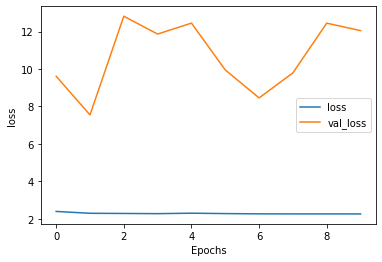

In [24]:
plot_graphs(history, 'loss')  

In [12]:
# top 5개 중 정답 레이블이 포함되어 있는지의 정확도 측정을 위한 함수 정의
def calc_accuracy_top5(X, Y):
    max_vals, max_indices = torch.sort(X,descending=True)
    yes_num=0
    for ind, vv in enumerate(max_indices) :
        target = Y[ind]
        compare_value = vv[:5]
        if compare_value in target : 
            yes_num+=1
    
    train_acc = yes_num / max_indices.size()[0]
    return train_acc

In [13]:
# top 3개 중 정답 레이블이 포함되어 있는지의 정확도 측정을 위한 함수 정의
def calc_accuracy_top3(X, Y):
    max_vals, max_indices = torch.sort(X,descending=True)
    yes_num=0
    for ind, vv in enumerate(max_indices) :
        target = Y[ind]
        compare_value = vv[:3]
        if compare_value in target : 
            yes_num+=1
    
    train_acc = yes_num / max_indices.size()[0]
    return train_acc